# Regression Models Selection

## Preparation

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style='darkgrid', rc={'axes.linewidth':1, 'axes.edgecolor':'black'})

Creating Dataset

In [2]:
X = np.array([range(10)]).reshape(len(range(10)),1)
y = np.array([50,100,150,250,200,300,350,450,700,1000])

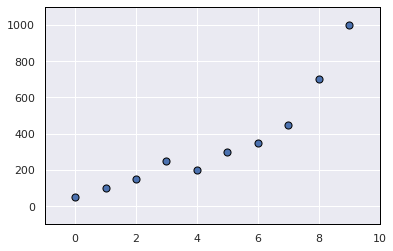

In [3]:
sns.scatterplot(x=X[:,0], y=y, cmap='Blues', edgecolor='black', linewidth=1, s=50)
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

It is also possible to plot random values using Scikit-learn make_regression module

In [4]:
# from sklearn.datasets import make_regression
# X, y, coef = make_regression(n_samples=100, n_features=1, coef=True, effective_rank=1, noise=2, random_state=101)

In [5]:
# sns.scatterplot(x=X[:,0], y=y+coef, cmap='Blues', edgecolor='black', linewidth=1, s=50)
# plt.show()

Creating function for Adjusted R-Squared


In [6]:
def adjusted_r2(y_test, y_pred, X, p=1):
  if len(X.shape) > 1:
    p = X.shape[1]
  n = len(X)
  r2 = r2_score(y_test, y_pred)
  return 1-(1-r2)*((n-1)/(n-p-1))

Train-Test-Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visuals (relevant only for 1 Independent variable)

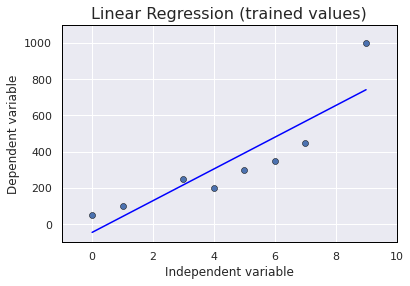

In [9]:
sns.scatterplot(x=X_train[:,0], y=y_train, edgecolor='black')
sns.lineplot(x=X_train[:,0], y=regressor.predict(X_train), color='blue')

plt.title('Linear Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

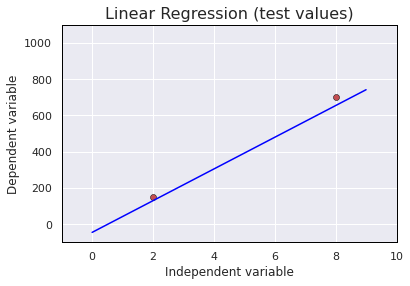

In [10]:
sns.scatterplot(x=X_test[:,0], y=y_test, color='r', edgecolor='black')
sns.lineplot(x=X_train[:,0], y=regressor.predict(X_train), color = 'blue')

plt.title('Linear Regression (test values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

#### Results:

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9836594547963119

In [13]:
adjusted_r2(y_test, y_pred, X)

0.9816168866458509

## Polynomial Regression

Polynomial Regression X values must be sorted in ascending order (only for visuals).

In [14]:
X_train_sorted = np.array(sorted(zip(X_train[:,0],y_train)))[:,0].reshape(len(X_train),1)
y_train_sorted = np.array(sorted(zip(X_train[:,0],y_train)))[:,1]

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3)
X_train_poly = poly_features.fit_transform(X_train_sorted)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train_sorted)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visuals (relevant only for 1 Independent variable)

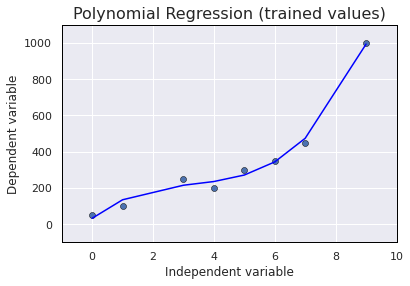

In [16]:
sns.scatterplot(x=X_train_sorted[:,0], y=y_train_sorted, edgecolor='black')
sns.lineplot(x=X_train_sorted[:,0], y=regressor.predict(X_train_poly), color='blue')

plt.title('Polynomial Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

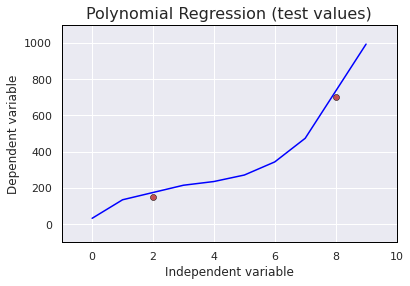

In [17]:
sns.scatterplot(x=X_test[:,0], y=y_test, color='r', edgecolor='black')
sns.lineplot(x=X_train_sorted[:,0], y=regressor.predict(X_train_poly), color='blue')

plt.title('Polynomial Regression (test values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

#### Results:

In [18]:
X_test_poly = poly_features.transform(X_test)
y_pred = regressor.predict(X_test_poly)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.988429660699976

In [20]:
adjusted_r2(y_test, y_pred, X)

0.9869833682874729

## Support Vector Regression (SVR)

Support Vector Regression must have its Y values reshaped (to the form of 2 dimensions [[ ]] ).
Also, the X values must be sorted in ascending order (only for visuals).

In [21]:
X_train_sorted = np.array(sorted(zip(X_train[:,0],y_train)))[:,0].reshape(len(X_train),1)
y_train_sorted = np.array(sorted(zip(X_train[:,0],y_train)))[:,1].reshape(len(y_train),1)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train_sorted)
y_train_scaled = sc_y.fit_transform(y_train_sorted)

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train_scaled[:,0])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Visuals (relevant only for 1 Independent variable)

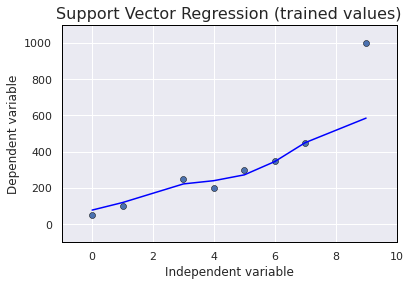

In [24]:
sns.scatterplot(x=X_train_sorted[:,0], y=y_train_sorted[:,0], edgecolor='black')
sns.lineplot(x=X_train_sorted[:,0], y=sc_y.inverse_transform(regressor.predict(X_train_scaled)), color='blue')

plt.title('Support Vector Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

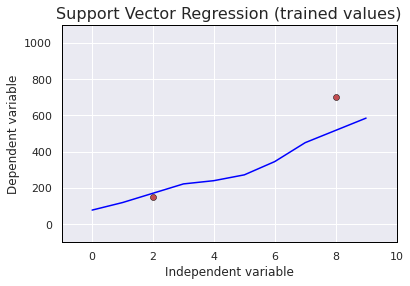

In [25]:
sns.scatterplot(x=X_test[:,0], y=y_test, color='r', edgecolor='black')
sns.lineplot(x=X_train_sorted[:,0], y=sc_y.inverse_transform(regressor.predict(X_train_scaled)), color='blue')

plt.title('Support Vector Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

#### Results:

In [26]:
X_test_scaled = sc_X.transform(X_test)
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8340637850646135

In [28]:
adjusted_r2(y_test, y_pred, X)

0.8133217581976903

## Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 101)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=101, splitter='best')

#### Visuals (relevant only for 1 Independent variable)

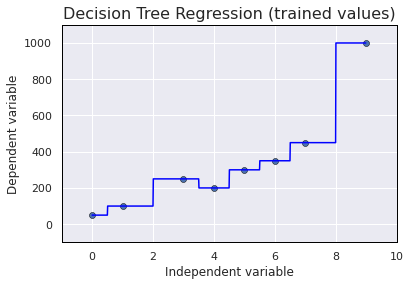

In [30]:
X_grid = np.arange(min(X_train[:,0]), max(X_train[:,0]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

sns.scatterplot(x=X_train[:,0], y=y_train, edgecolor='black')
sns.lineplot(x=X_grid[:,0], y=regressor.predict(X_grid), color='blue')

plt.title('Decision Tree Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

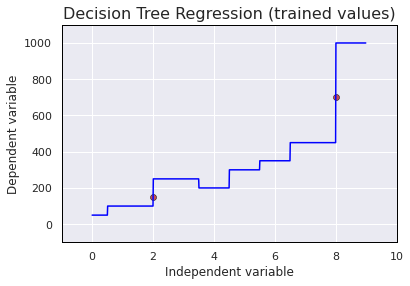

In [31]:
X_grid = np.arange(min(X_train[:,0]), max(X_train[:,0]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

sns.scatterplot(x=X_test[:,0], y=y_test, color='r', edgecolor='black')
sns.lineplot(x=X_grid[:,0], y=regressor.predict(X_grid), color='blue')

plt.title('Decision Tree Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

#### Results:

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5702479338842975

In [34]:
adjusted_r2(y_test, y_pred, X)

0.5165289256198347

## Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 101)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

#### Visuals (relevant only for 1 Independent variable)

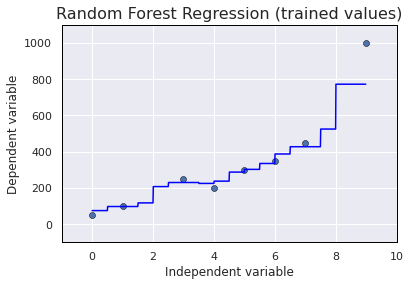

In [36]:
X_grid = np.arange(min(X_train[:,0]), max(X_train[:,0]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

sns.scatterplot(x=X_train[:,0], y=y_train, edgecolor='black')
sns.lineplot(x=X_grid[:,0], y=regressor.predict(X_grid), color='blue')

plt.title('Random Forest Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

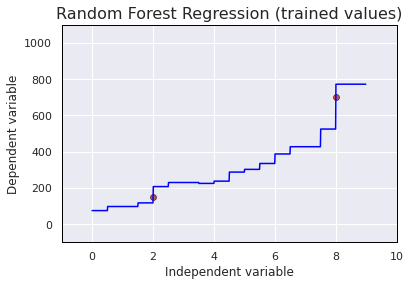

In [37]:
X_grid = np.arange(min(X_train[:,0]), max(X_train[:,0]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

sns.scatterplot(x=X_test[:,0], y=y_test, color='r', edgecolor='black')
sns.lineplot(x=X_grid[:,0], y=regressor.predict(X_grid), color='blue')

plt.title('Random Forest Regression (trained values)', fontsize=16)
plt.xlabel('Independent variable'), plt.ylabel('Dependent variable')
plt.xlim(-1,10), plt.ylim(-100,1100)
plt.show()

#### Results:

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7905371900826447

In [40]:
adjusted_r2(y_test, y_pred, X)

0.7643543388429752

# Once Cell Format

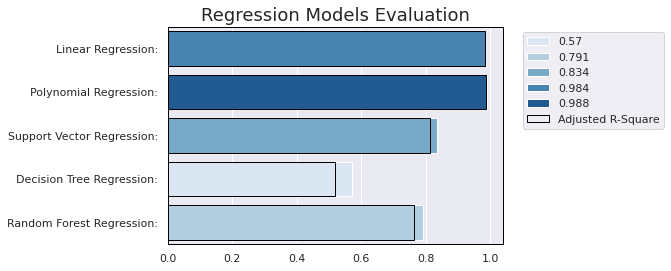

In [41]:
# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

X = np.array([range(10)]).reshape(len(range(10)),1)
y = np.array([50,100,150,250,200,300,350,450,700,1000])

# Creating function for Adjusted R-Squared:
def adjusted_r2(y_test, y_pred, X, p=1):
  if len(X.shape) > 1:
    p = X.shape[1]
  n = len(X)
  r2 = r2_score(y_test, y_pred)
  return 1-(1-r2)*((n-1)/(n-p-1))

results_list = []

# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# Linear Regression:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results_list.append(['Linear Regression:',[f'R-Squared: {round(r2_score(y_test, y_pred),3)}', f'Adjusted R-Squared: {round(adjusted_r2(y_test, y_pred, X),3)}']])

# Polynomial Regression:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3)
X_train_poly = poly_features.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
X_test_poly = poly_features.transform(X_test)
y_pred = regressor.predict(X_test_poly)
results_list.append(['Polynomial Regression:',[f'R-Squared: {round(r2_score(y_test, y_pred),3)}', f'Adjusted R-Squared: {round(adjusted_r2(y_test, y_pred, X),3)}']])

# Support Vector Regression:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(len(y_train),1))
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train_scaled[:,0])
X_test_scaled = sc_X.transform(X_test)
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled)
results_list.append(['Support Vector Regression:',[f'R-Squared: {round(r2_score(y_test, y_pred),3)}', f'Adjusted R-Squared: {round(adjusted_r2(y_test, y_pred, X),3)}']])

# Decision Tree Regression:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 101)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results_list.append(['Decision Tree Regression:',[f'R-Squared: {round(r2_score(y_test, y_pred),3)}', f'Adjusted R-Squared: {round(adjusted_r2(y_test, y_pred, X),3)}']])

# Random Forest Regression:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 101)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results_list.append(['Random Forest Regression:',[f'R-Squared: {round(r2_score(y_test, y_pred),3)}', f'Adjusted R-Squared: {round(adjusted_r2(y_test, y_pred, X),3)}']])


sns.barplot(x=[float(results_list[i][1][0].split()[1]) for i in range(len(results_list))],
            y=[results_list[i][0] for i in range(len(results_list))],
            palette='Blues', hue=[float(results_list[i][1][0].split()[1]) for i in range(len(results_list))], dodge=False)

sns.barplot(x=[float(results_list[i][1][1].split()[2]) for i in range(len(results_list))],
            y=[results_list[i][0] for i in range(len(results_list))],
            linewidth=1, edgecolor='black', facecolor=(0, 0, 0, 0), hue=['Adjusted R-Square']*len(results_list), dodge=False)

plt.title("Regression Models Evaluation", fontsize=18)
plt.legend(bbox_to_anchor = (0,0,1.5,1))
plt.show()